In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from linearRegression import LinearRegression

def tai_du_lieu(duong_dan: str):
    df = pd.read_csv(duong_dan)

    # Loại bỏ các cột không cần thiết
    # Thêm 'ad_id' nếu có trong file dummies.csv và không phải là feature
    # Nếu 'dummies.csv' được tạo từ dataExplore.ipynb, nó sẽ không có 'ad_id' nữa.
    # errors='ignore' sẽ bỏ qua nếu cột không tồn tại.
    columns_to_drop = ['Price', 'log_price']
    if 'ad_id' in df.columns:  # Kiểm tra xem cột ad_id có tồn tại không
        columns_to_drop.append('ad_id')

    X = df.drop(columns=columns_to_drop, errors='ignore')

    # Chuẩn hóa toàn bộ X
    scaler = StandardScaler()
    # Đảm bảo X chỉ chứa các cột số trước khi chuẩn hóa
    X_numeric = X.select_dtypes(include=np.number)
    X_scaled_values = scaler.fit_transform(X_numeric)

    # Tạo lại DataFrame X_scaled với các cột đã chuẩn hóa và giữ lại các cột không phải số nếu có
    X_scaled_df = pd.DataFrame(X_scaled_values, columns=X_numeric.columns, index=X.index)


    # Lấy log_price làm y
    y_log = df['log_price'].values
    y = df['Price'].values  # Price gốc để so sánh cuối cùng

    # Trả về DataFrame X chuẩn hóa và tên cột
    return X_scaled_df, y_log, y, X_numeric.columns.tolist()


def chia_train_test(X, y, ti_le_test=0.2, seed=42):
    rng = np.random.default_rng(seed)
    idx = rng.permutation(len(X))
    test_len = int(len(X) * ti_le_test)
    test_idx, train_idx = idx[:test_len], idx[test_len:]
    # Đảm bảo X và y được индексируются bằng iloc nếu là DataFrame/Series
    X_train = X.iloc[train_idx] if isinstance(X, pd.DataFrame) else X[train_idx]
    X_test = X.iloc[test_idx] if isinstance(X, pd.DataFrame) else X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train, X_test, y_train, y_test

Đang tải và xử lý dữ liệu...
Dữ liệu sau xử lý: 8251 dòng, 14 biến.


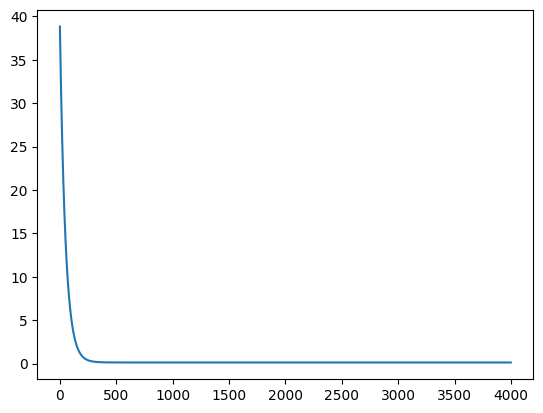

In [ ]:
file_csv = 'dataset.csv'

X, y_log, y_original_price, ten_cot = tai_du_lieu(file_csv)
X_train, X_test, y_train_log, y_test_log = chia_train_test(X, y_log)
model = LinearRegression(learning_rate=0.01, n_iterations=4000)
model.fit(X_train.values, y_train_log)
plt.plot([i for i in range(len(model.cost_history))], model.cost_history)

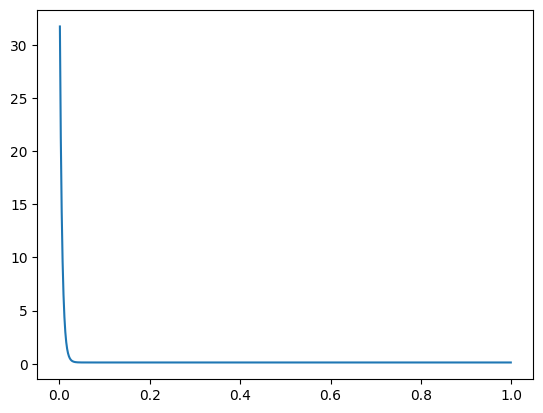

In [8]:
alphas = [0.001*i for i in range(1, 1000)]
mseLog = []
for i in alphas:
    model = LinearRegression(learning_rate=0.1*i, n_iterations=1000)
    mseLog.append(model.fit(X_train.values, y_train_log).cost_history[-1])
plt.plot(alphas, mseLog)


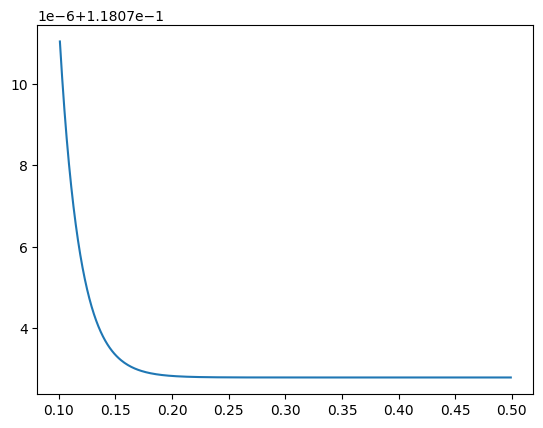

In [9]:
alphas = [0.1+ 0.001*i for i in range(1, 400)]
mseLog = []
for i in alphas:
    model = LinearRegression(learning_rate=0.1*i, n_iterations=1000)
    mseLog.append(model.fit(X_train.values, y_train_log).cost_history[-1])
plt.plot(alphas, mseLog)